In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import *
from plotly import tools


In [2]:
df=pd.read_excel('/content/SalesData.xlsx',parse_dates=True, squeeze=True)
test=pd.read_excel('/content/predictionempty.xlsx',parse_dates=True, squeeze=True)

In [3]:
df.head()

,From,Sold Units,Retail_Sales (in USD),Industrial_Production
0,2013-01-01 00:00:00,3,450,101.70
1,2013-01-01 00:15:00,9,1350,101.96
2,2013-01-01 00:30:00,15,2250,101.20
3,2013-01-01 01:00:00,6,900,102.60
4,2013-01-01 01:15:00,6,900,101.44


In [4]:
test.head()

,Date,Sold_Units
0,2019-09-30,NaN
1,2019-10-01,NaN
2,2019-10-02,NaN
3,2019-10-03,NaN
4,2019-10-04,NaN


In [5]:
df['Date'] = pd.to_datetime(df['From']).dt.date

In [6]:
df.head()

,From,Sold Units,Retail_Sales (in USD),Industrial_Production,Date
0,2013-01-01 00:00:00,3,450,101.70,2013-01-01
1,2013-01-01 00:15:00,9,1350,101.96,2013-01-01
2,2013-01-01 00:30:00,15,2250,101.20,2013-01-01
3,2013-01-01 01:00:00,6,900,102.60,2013-01-01
4,2013-01-01 01:15:00,6,900,101.44,2013-01-01


In [7]:
#df.drop(['Export_Price_index', 'Import_Price_Index', 'Consumer_Price_Index', 'Employees', 'Industrial_Production', 'Material_Supply_Textile'], axis =1 , inplace=True)

In [8]:
df=df.groupby(['Date'])['Sold Units'].sum().reset_index()
df.head()

,Date,Sold Units
0,2013-01-01,2319
1,2013-01-02,25179
2,2013-01-03,26097
3,2013-01-04,25737
4,2013-01-05,11385


In [9]:
Values = df['Sold Units']*150

In [10]:
print(Values)

0        347850
1       3776850
2       3914550
3       3860550
4       1707750
         ...   
2458    1451700
2459    1423350
2460    1618200
2461     694350
2462     407700
Name: Sold Units, Length: 2463, dtype: int64


In [11]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['WeekDay'] = pd.to_datetime(df['Date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [12]:
test['Date'] = pd.to_datetime(test['Date']).dt.date
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['WeekDay'] = pd.to_datetime(test['Date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [13]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay
0,2013-01-01,2319,2013,1,1,1
1,2013-01-02,25179,2013,1,2,2
2,2013-01-03,26097,2013,1,3,3
3,2013-01-04,25737,2013,1,4,4
4,2013-01-05,11385,2013,1,5,5


In [14]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay
0,2013-01-01,2319,2013,1,1,1
1,2013-01-02,25179,2013,1,2,2
2,2013-01-03,26097,2013,1,3,3
3,2013-01-04,25737,2013,1,4,4
4,2013-01-05,11385,2013,1,5,5


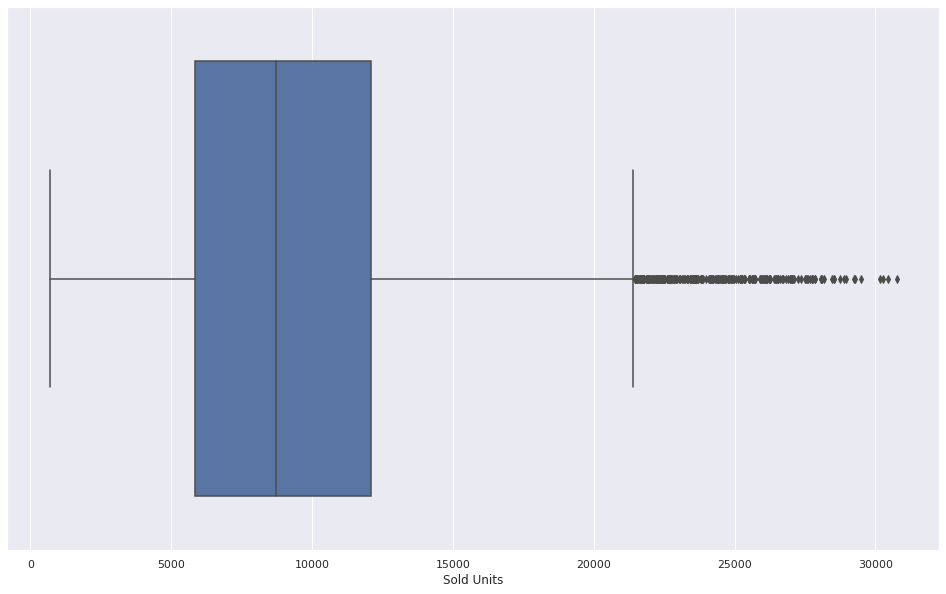

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16.7, 10)})
sns.boxplot(x = df['Sold Units'])

[array([5859.,  681.]), array([12093., 21405.])]

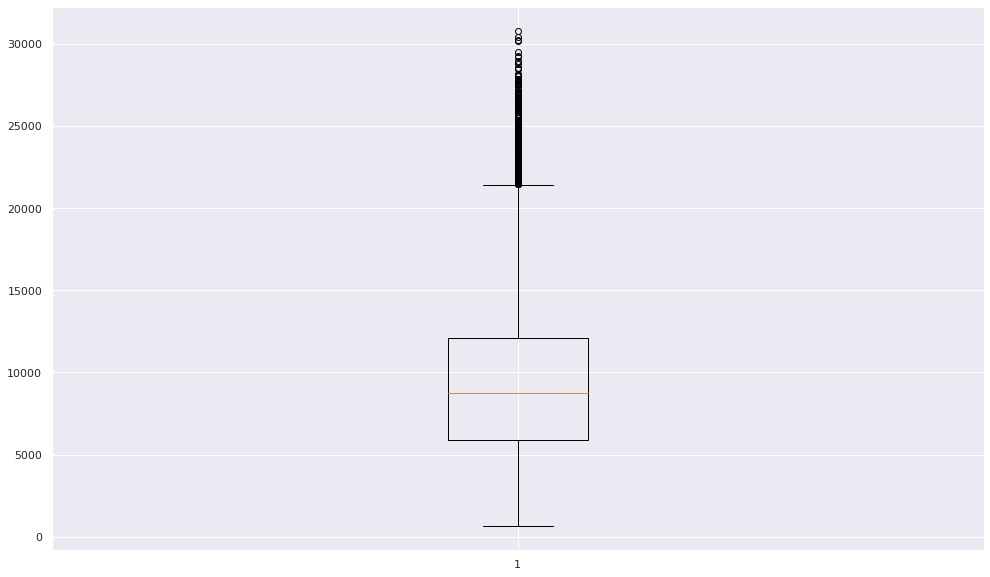

In [16]:
B=plt.boxplot(df['Sold Units'])
[item.get_ydata() for item in B['whiskers']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



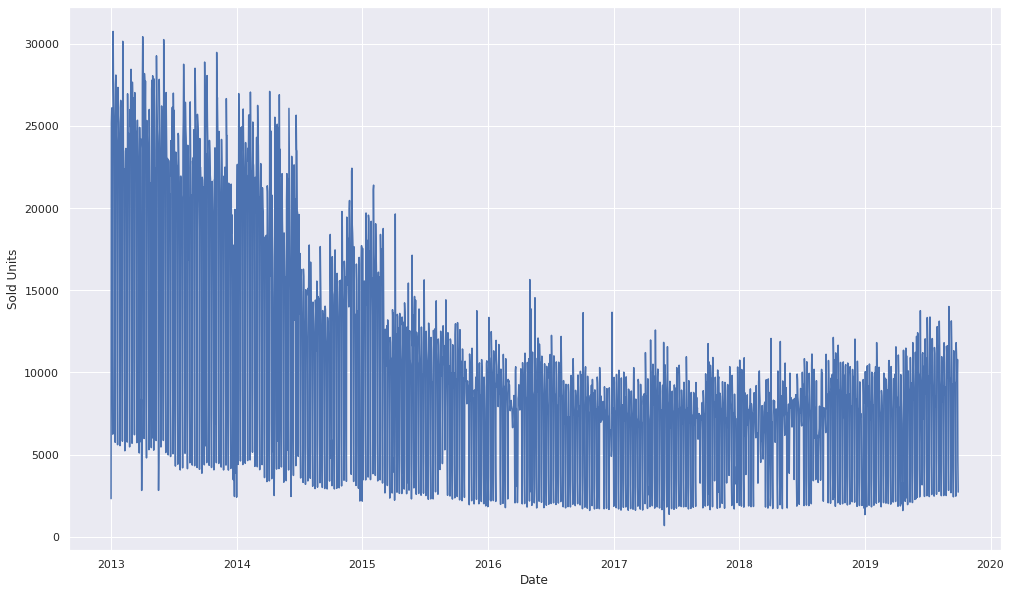

In [17]:
sns.lineplot(df['Date'], df['Sold Units'])

In [18]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=df['Date'], y=df['Sold Units'], name="Per day Units sold"),secondary_y=True)

figd.add_trace(go.Scatter(x=df['Date'], y= Values, name="Per Day Sales"),secondary_y=True)

figd.update_layout(title_text="Units Sold vs Sales")

figd.update_xaxes(title_text="Date")

#figd.update_yaxes(title_text="Daily Recovered", secondary_y=False)
figd.update_yaxes(title_text="Sales", secondary_y=False)

'''figd = px.line(df, x=df['Date'], y=Values, title='Sold Units')
for ser in figd['data']:
    ser['text']=list(set([d.strftime('%Y-%m-%d') for d in df['Date']]))
    ser['hovertemplate']='Date=%{text}<br>Sales=%{y}<extra></extra>' '''

figd.show()

In [20]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [21]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay
0,2013-01-01,2319,2013,1,1,1
1,2013-01-02,25179,2013,1,2,2
2,2013-01-03,26097,2013,1,3,3
3,2013-01-04,25737,2013,1,4,4
4,2013-01-05,11385,2013,1,5,5


In [22]:
df.tail()

,Date,Sold Units,Year,Week,Day,WeekDay
2458,2019-09-25,9678,2019,39,25,2
2459,2019-09-26,9489,2019,39,26,3
2460,2019-09-27,10788,2019,39,27,4
2461,2019-09-28,4629,2019,39,28,5
2462,2019-09-29,2718,2019,39,29,6


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [24]:
from sklearn.model_selection import train_test_split
predictors=df.drop(['Sold Units', 'Date'],axis=1)
target=df['Sold Units']
x_train,x_test,y_train,y_test=train_test_split(predictors,target,test_size=0.2,random_state=7)

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_test)
    lin_r= r2_score(y_test, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
  scores(i)

In [26]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso','DecisionTreeRegressor'],
    'Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
2,RandomForestRegressor,0.876404
1,KNeighborsRegressor,0.662146
0,LinearRegression,0.574040
3,Lasso,0.574038
4,DecisionTreeRegressor,0.565897


In [27]:
#Hypertuned Model
model = RandomForestRegressor(oob_score = True,n_jobs =3,random_state =7,
                              max_features = "auto", min_samples_leaf =4)

In [28]:
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=3, oob_score=True,
                      random_state=7, verbose=0, warm_start=False)

In [29]:
pred = model.predict(x_test)

In [30]:
#R2 Score
r2_score(pred,y_test)

0.8563207397908065

In [31]:
import numpy as np

def mean_percentage_error(y_test, pred): 
    y_test, pred = np.array(y_test), np.array(pred)
    return np.mean(np.array((y_test - pred) / y_test)) * 100

In [32]:
mean_percentage_error(y_test, pred)


-8.918135633307077

In [33]:
df.head()


,Date,Sold Units,Year,Week,Day,WeekDay
0,2013-01-01,2319,2013,1,1,1
1,2013-01-02,25179,2013,1,2,2
2,2013-01-03,26097,2013,1,3,3
3,2013-01-04,25737,2013,1,4,4
4,2013-01-05,11385,2013,1,5,5


In [34]:
test1=test.drop(['Sold_Units', 'Date'],axis=1)


In [35]:
pred2 = model.predict(test1)

In [36]:
test['Sold_Units']=pred2.round(0)

In [37]:
test.head()


,Date,Sold_Units,Year,Week,Day,WeekDay
0,2019-09-30,11424.0,2019,40,30,0
1,2019-10-01,10810.0,2019,40,1,1
2,2019-10-02,9371.0,2019,40,2,2
3,2019-10-03,9478.0,2019,40,3,3
4,2019-10-04,9506.0,2019,40,4,4


In [38]:
result=test[['Date','Sold_Units']]
result.to_excel('finalresult.xlsx')


In [40]:
result.head()

,Date,Sold_Units
0,2019-09-30,11424.0
1,2019-10-01,10810.0
2,2019-10-02,9371.0
3,2019-10-03,9478.0
4,2019-10-04,9506.0


In [41]:
result['Retail_Sales (in USD)'] = result['Sold_Units']* 150

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
result.head()

,Date,Sold_Units,Retail_Sales (in USD)
0,2019-09-30,11424.0,1713600.0
1,2019-10-01,10810.0,1621500.0
2,2019-10-02,9371.0,1405650.0
3,2019-10-03,9478.0,1421700.0
4,2019-10-04,9506.0,1425900.0


In [43]:
result.tail()

,Date,Sold_Units,Retail_Sales (in USD)
666,2021-07-27,11654.0,1748100.0
667,2021-07-28,9591.0,1438650.0
668,2021-07-29,9528.0,1429200.0
669,2021-07-30,9264.0,1389600.0
670,2021-07-31,5669.0,850350.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



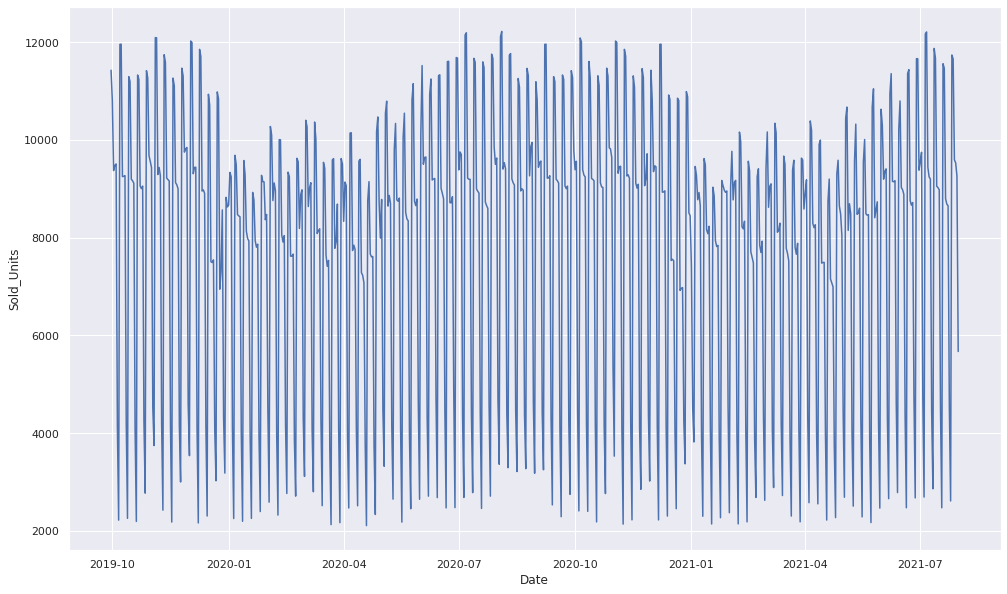

In [44]:
sns.lineplot(result['Date'], result['Sold_Units'])

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=result['Date'], y=result['Sold_Units'], name="Per Day Units Sold"),secondary_y=True)
figd.add_trace(go.Scatter(x=result['Date'], y=result['Retail_Sales (in USD)'], name="Per Day Sales"),secondary_y=True)

figd.update_layout(title_text="Units Sold vs Sales")

figd.update_xaxes(title_text="Date")

#figd.update_yaxes(title_text="Daily Recovered", secondary_y=False)
figd.update_yaxes(title_text="Sales", secondary_y=False)

'''fig1 = px.line(result, x=result['Date'], y=result['Retail_Sales (in USD)'], title='Sold Units')
for ser in fig1['data']:
    ser['text']=list(set([d.strftime('%Y-%m-%d') for d in result['Date']]))
    ser['hovertemplate']='Date=%{text}<br>Sales=%{y}<extra></extra>' '''

figd.show()

In [46]:
result.to_excel("Sales_finalresult.xlsx", index = False)